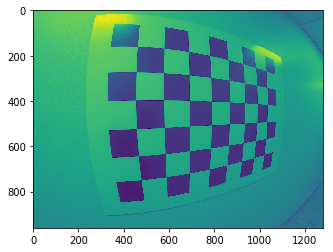

In [37]:
import numpy as np
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

img = mpimg.imread("calibration_wide/GOPR0032.jpg")
plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)




In [39]:
## Arrays to store imagepoints and object points from all images

nx = 8#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

# Prepare objpoints
    
objpoints = []
imgpoints = []

objp = np.zeros((6*8,3),np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)
      

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    imgpoints.append(corners)
    objpoints.append(objp)
    #cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    #plt.imshow(img)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undist = cv2.undistort(img, mtx, dist, None, mtx)
        
    # 2) Convert to grayscale
    grayd = cv2.cvtColor(undist,cv2.COLOR_RGB2GRAY)
    
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(grayd, (nx,ny), None)
    # 4) If corners found: 
    if ret == True:
        cv2.drawChessboardCorners(img, (8,6), corners, ret)           
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        offset = 100
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
            
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
            
            # e) use cv2.warpPerspective() to warp your image to a top-down view
        img_size = img[1::-1]
        warped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
          
    return warped, M

top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


UnboundLocalError: local variable 'warped' referenced before assignment

In [16]:
## Extra mgrid
x,y = np.mgrid[1:5,1:4]
print(x)
print ("next")
print(y)

[[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
next
[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]
